In [1]:
%matplotlib inline

import daft
import matplotlib.pyplot as plt

In [13]:
import numpy as np

Text(0, 0.5, 'appearance')

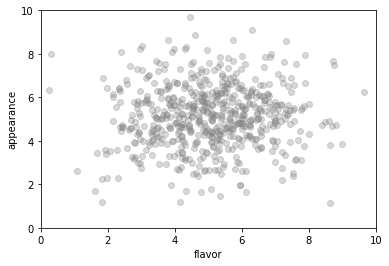

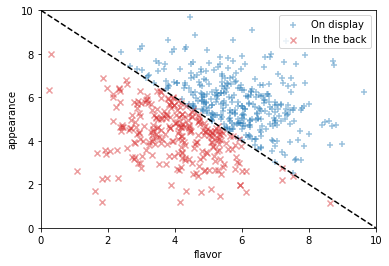

In [34]:
#import seaborn as sns

np.random.seed(103)
flavor = np.random.normal(5, 1.5, 600)
appearance = np.random.normal(5, 1.5, 600)
plt.scatter(flavor, appearance, color='gray', alpha=0.3)
plt.axis([0, 10, 0, 10])
#plt.axis('off')
plt.xlabel('flavor')
plt.ylabel('appearance')

f, ax = plt.subplots(1, 1)

mask = (flavor + appearance > 10)
ax.scatter(
    flavor[mask], appearance[mask], label='On display',
    color='tab:blue', marker='+', alpha=0.45
)
ax.scatter(
    flavor[~mask], appearance[~mask], label='In the back',
    color='tab:red', marker='x', alpha=0.45
)
ax.legend()
ax.plot([0, 10], [10, 0], 'k--')
ax.axis([0, 10, 0, 10])
ax.set_xlabel('flavor')
ax.set_ylabel('appearance')

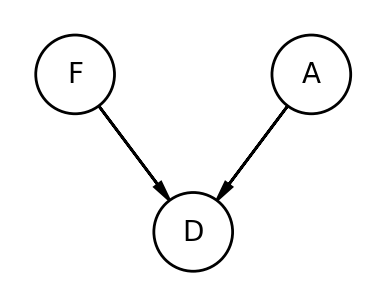

In [35]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("rain", "D", 0.75, -1, aspect=1.0)
pgm.add_node("umbrella", r"F", 0, 0, aspect=1.0)
pgm.add_node("wet", r"A", 1.5, 0, aspect=1.0)



pgm.add_edge("umbrella", "rain", )
pgm.add_edge("wet", "rain", )
#pgm.add_edge("umbrella", "wet")

pgm.render(dpi=200)
#plt.gca().set_xlabel('(e)')
#plt.tight_layout()
pgm.figure.savefig("berkson.png")

In [3]:
pgm.render?

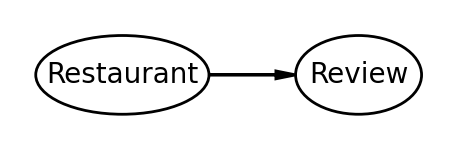

In [12]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
#pgm.add_node("rain", "Pandemic", 0.75, 1, aspect=2.1)
pgm.add_node("umbrella", r"Restaurant", 0, 0, aspect=2.2)
pgm.add_node("wet", r"Review", 1.5, 0, aspect=1.6)



#pgm.add_edge("rain", "umbrella")
#pgm.add_edge("rain", "wet")
pgm.add_edge("umbrella", "wet")

pgm.render(dpi=200)
#plt.gca().set_xlabel('(e)')
#plt.tight_layout()
pgm.figure.savefig("restaurants3.png")

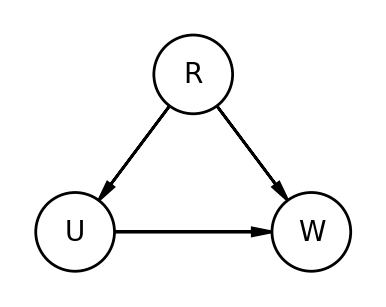

In [6]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("rain", "R", 0.75, 1, aspect=1.0)
pgm.add_node("umbrella", r"U", 0, 0, aspect=1.0)
pgm.add_node("wet", r"W", 1.5, 0, aspect=1.0)



pgm.add_edge("rain", "umbrella")
pgm.add_edge("rain", "wet")
pgm.add_edge("umbrella", "wet")

pgm.render(dpi=200)
#plt.gca().set_xlabel('(e)')
#plt.tight_layout()
pgm.figure.savefig("rain_.png")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


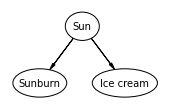

In [2]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("s", r"Sunburn", 0, 0, aspect=1.9)
pgm.add_node("i", r"Ice cream", 1.5, 0, aspect=2.3)
pgm.add_node("w", r"Sun", 0.75, 1, aspect=1.2)

pgm.add_edge("w", "i")
pgm.add_edge("w", "s")

pgm.render()
#plt.gca().set_xlabel('(e)')
plt.tight_layout()
pgm.figure.savefig("sunburn_icecream_.png")



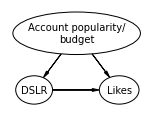

In [3]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("account", "Account popularity/\nbudget", 0.75, 1, aspect=3.0, scale=1.5)
pgm.add_node("dslr", r"DSLR", 0, 0, aspect=1.3)
pgm.add_node("likes", r"Likes", 1.5, 0, aspect=1.4)



pgm.add_edge("account", "dslr")
pgm.add_edge("account", "likes")
pgm.add_edge("dslr", "likes")

pgm.render()
#plt.gca().set_xlabel('(e)')
#plt.tight_layout()
pgm.figure.savefig("instagram_.png")

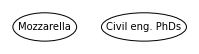

In [4]:
import matplotlib.pyplot as plt
#pgm = daft.PGM(node_ec=None)
pgm = daft.PGM()

### Line graph
pgm.add_node("mozz", r"Mozzarella", 0, 0, aspect=2.25)
pgm.add_node("phd", r"Civil eng. PhDs", 1.75, 0, aspect=3.0)


pgm.render()
#plt.gca().set_xlabel('(e)')
#plt.tight_layout()
pgm.figure.savefig("spurious.png")



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


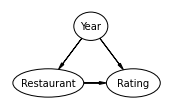

In [52]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("rating", r"Rating", 1.5, 0, aspect=1.9)
pgm.add_node("restaurant", r"Restaurant", 0, 0, aspect=2.5)
pgm.add_node("year", r"Year", 0.75, 1, aspect=1.2)

pgm.add_edge("year", "rating")
pgm.add_edge("year", "restaurant")

pgm.add_edge("restaurant", "rating")

pgm.render()
#plt.gca().set_xlabel('(e)')
plt.tight_layout()
pgm.figure.savefig("restaurant.png")



In [44]:
import numpy as np
import pandas as pd
import random

import itertools

def make_simpson_df_and_science_table(
    treatments, outcomes, confounds, counts, treatment_name, outcome_name, confound_name
):
    agg_rows = []
    sample_rows = []
    def other(t):
        return list(set(treatments) - {t})[0]
    for ((it, t), (io, o), (ic, c)) in itertools.product(
        *(enumerate(l) for l in (treatments, outcomes, confounds))
    ):
        n = counts[it, io, ic]
        row = {
            treatment_name: t,
            outcome_name: o,
            confound_name: c,
            'count': n
        }
        agg_rows.append(row)
        
        sample_row = {
            #f"{outcome_name} for {treatment_name}={t}": io,
            #f"{outcome_name} for {treatment_name}={other(t)}": np.nan,
            f"{outcome_name} for {t}": io,
            f"{outcome_name} for {other(t)}": np.nan,
            confound_name: c
        }
        sample_rows.extend([sample_row] * n)
    random.shuffle(sample_rows)
    return (pd.DataFrame(agg_rows), pd.DataFrame(sample_rows))

        

In [45]:
food, food_sci = make_simpson_df_and_science_table(
    ["A", "B"],
    ["👎", "👍"],
    ["2019", "2020"],
    np.array([
        [[0, 80], [20, 100]],
        [[10, 10], [70, 10]],
    ]),
    "Restaurant", "Dish rating", "Year",
)
food.to_csv('restaurants.csv', index=False)
food_sci.to_csv('restaurants_counterfactuals.csv', index=False)

In [ ]:
# Suppose we are trying to measure whether a certain pesticide is effective at killing insects that eat crops. We conduct a randomized controlled trial, and obtain the following data:

crops = make_simpson_df(
    ["Pesticide", "Control"],
    ["No insects", "insects"],
    ["Dead", "Alive"],
    np.array([
        [[0, 80], [20, 100]],
        [[10, 10], [70, 10]],
    ]),
    "Crop treatment", "", "Year",
)
food.to_csv('restaurants.csv', index=False)
